In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "theNotebook = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [2]:
### JUPYTER NOTEBOOK EAGER LOAD ###
import io, os, sys, types, re
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def get_chapter_number(file_name):
    hit = re.match(r'(?P<chapter>\d+)\..*', file_name)
    return int(hit['chapter'])

files = !ls *.ipynb
files = sorted(files, key=lambda f: int(f.split('.')[0]))
files = filter(lambda file: get_chapter_number(file) < get_chapter_number(theNotebook), files)


nbs = []
for file in files:
    with io.open(file, 'r', encoding='utf-8') as f:
        nbs.append(read(f, 4))
        
each_code_cells = []
for nb in nbs:
    each_code_cells.append(filter(lambda c: c['cell_type'] == 'code', nb.cells))
    
for code_cells in each_code_cells:
    for code_cell in code_cells:
        code = InteractiveShell.instance().input_transformer_manager.transform_cell(code_cell.source)
        try:
            if code.split("\n")[0] == '### JUPYTER NOTEBOOK EAGER LOAD ###': continue
            get_ipython().run_cell_magic('capture', '', code)
        except RuntimeError:
            continue

In [3]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

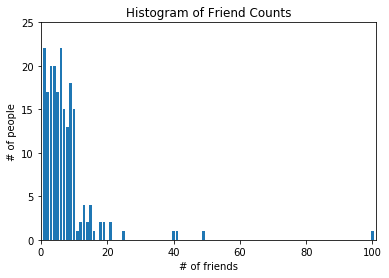

In [4]:
friend_counts = Counter(num_friends)
xs = range(101)                        # largest value is 100
ys = [friend_counts[x] for x in xs]    # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [5]:
num_of_points = len(num_friends)
num_of_points

204

In [6]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
largest_value, smallest_value

(100, 1)

In [7]:
sorted_value = sorted(num_friends)
smallest_value = sorted_value[0]
second_smallest_value = sorted_value[1]
second_largest_value = sorted_value[-2]
smallest_value, second_smallest_value, second_largest_value

(1, 1, 49)

In [8]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [9]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

In [10]:
def quantile(x, p):
    """return the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.10)
quantile(num_friends, 0.25)
quantile(num_friends, 0.75)
quantile(num_friends, 0.90)

13

In [11]:
# `range` already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [12]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

In [13]:
import math # yet?

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [14]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

In [15]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

In [16]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
    
correlation(num_friends, daily_minutes)

0.24736957366478218

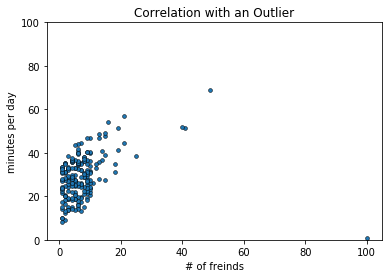

In [17]:
def simple_scatter_plot_yrange_0_100(title, xs, xlabel, ys, ylabel):
    plt.scatter(xs, ys, s=15, linewidth=0.5, edgecolors='black')
    plt.title(title)
    plt.ylim(0, 100)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
simple_scatter_plot_yrange_0_100("Correlation with an Outlier",
                                 num_friends,
                                 "# of freinds",
                                 daily_minutes,
                                 "minutes per day")

In [18]:
outlier = num_friends.index(100)

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

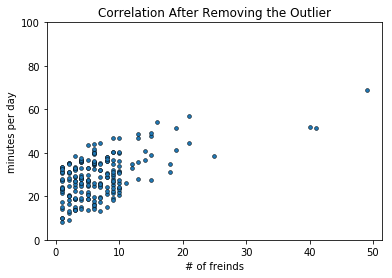

In [19]:
simple_scatter_plot_yrange_0_100("Correlation After Removing the Outlier",
                                 num_friends_good,
                                 "# of freinds",
                                 daily_minutes_good,
                                 "minutes per day")

In [20]:
# equals the absolute value
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

correlation(x, y)

0.0

In [21]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

correlation(x, y)

1.0